This notebook shows how to combine curlometer calculations with FPI data; the output figure includes:

1. DIS energy spectra
2. DES energy spectra
3. B-field in GSE coordinates
4. div/curl
5. J (Jx, Jy, Jz and J magnitude)
6. DES velocity (Vx, Vy, Vz and V magnitude)
7. DIS and DES densities
8. DES temperatures
9. DIS temperatures


Based on the IDL crib sheet:

projects/mms/examples/advanced/mms_fpi_curlometer_crib.pro

This command sets up the PySPEDAS environment when running in Google Colab.  You can skip it or comment it out if you're running this notebook in an environment that already has PySPEDAS installed.

In [1]:
!pip install pyspedas

     |████████████████████████████████| 844 kB 5.1 MB/s 
     |████████████████████████████████| 15.4 MB 58.1 MB/s 
     |████████████████████████████████| 113 kB 16.5 MB/s 
     |████████████████████████████████| 83 kB 1.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 41 kB 491 kB/s 
  Created wheel for cdflib: filename=cdflib-0.4.4-py3-none-any.whl size=79239 sha256=a3f428aa63ebefc8399d05399607fc8a4ec9b477d9225d778a1efada12510fa3
  Stored in directory: /root/.cache/pip/wheels/58/1f/02/5567c76a728aeb17cb09350093fbc70787014ca1740f50e862
  Created wheel for hapiclient: filename=hapiclient-0.2.3-py3-none-any.whl size=30736 sha256=95967ffea70159ce80b16968ba8124e6d9d104cb5455b075b306ea81a74b1e84
  Stored in directory: /root/.cache/pip/wheels/e6/fb/07/878e46dae2a859e5064c0806df12d152207eb4ba4bed5286d3
Successfully built cdflib hapiclient


In [2]:
trange = ['2017-01-31/10:27:34', '2017-01-31/10:27:56']
probe = '1' # must be a string (for these examples)

Load the MEC, FGM and FPI data


Note: be sure to center the FPI measurements!

In [3]:
import pyspedas

pyspedas.mms.fpi(center_measurement=True,
                 probe=probe, 
                 trange=trange, 
                 datatype=['des-moms', 'dis-moms'], 
                 data_rate='brst', 
                 time_clip=True)

pyspedas.mms.fgm(probe=[1, 2, 3, 4], 
                 trange=trange, 
                 data_rate='brst', 
                 time_clip=True)

pyspedas.mms.mec(probe=[1, 2, 3, 4],
                 trange=trange,
                 data_rate='brst', 
                 time_clip=True)

SDC username (blank for public access): 


31-Mar-22 20:15:40: Downloading mms1_fpi_brst_l2_des-moms_20170131102733_v3.4.0.cdf to pydata/mms1/fpi/brst/l2/des-moms/2017/01/31
31-Mar-22 20:15:42: Downloading mms1_fpi_brst_l2_dis-moms_20170131102733_v3.4.0.cdf to pydata/mms1/fpi/brst/l2/dis-moms/2017/01/31


Time clip was applied to: mms1_des_errorflags_brst
Time clip was applied to: mms1_des_compressionloss_brst
Time clip was applied to: mms1_des_steptable_parity_brst
Time clip was applied to: mms1_des_startdelphi_count_brst
Time clip was applied to: mms1_des_startdelphi_angle_brst
Time clip was applied to: mms1_des_sector_despinp_brst
Time clip was applied to: mms1_des_pitchangdist_lowen_brst
Time clip was applied to: mms1_des_pitchangdist_miden_brst
Time clip was applied to: mms1_des_pitchangdist_highen_brst
Time clip was applied to: mms1_des_energyspectr_px_brst
Time clip was applied to: mms1_des_energyspectr_mx_brst
Time clip was applied to: mms1_des_energyspectr_py_brst
Time clip was applied to: mms1_des_energyspectr_my_brst
Time clip was applied to: mms1_des_energyspectr_pz_brst
Time clip was applied to: mms1_des_energyspectr_mz_brst
Time clip was applied to: mms1_des_energyspectr_par_brst
Time clip was applied to: mms1_des_energyspectr_anti_brst
Time clip was applied to: mms1_des_e

31-Mar-22 20:15:45: Downloading mms1_fgm_brst_l2_20170131102733_v5.87.0.cdf to pydata/mms1/fgm/brst/l2/2017/01/31
31-Mar-22 20:15:46: Downloading mms2_fgm_brst_l2_20170131102733_v5.87.0.cdf to pydata/mms2/fgm/brst/l2/2017/01/31
31-Mar-22 20:15:46: Downloading mms3_fgm_brst_l2_20170131102733_v5.87.0.cdf to pydata/mms3/fgm/brst/l2/2017/01/31
31-Mar-22 20:15:46: Downloading mms4_fgm_brst_l2_20170131102733_v5.87.0.cdf to pydata/mms4/fgm/brst/l2/2017/01/31


Time clip was applied to: mms1_fgm_b_gse_brst_l2
Time clip was applied to: mms1_fgm_b_gsm_brst_l2
Time clip was applied to: mms1_fgm_b_dmpa_brst_l2
Time clip was applied to: mms1_fgm_b_bcs_brst_l2
Time clip was applied to: mms1_fgm_flag_brst_l2
Time clip was applied to: mms1_fgm_r_gse_brst_l2
Time clip was applied to: mms1_fgm_r_gsm_brst_l2
Time clip was applied to: mms1_fgm_hirange_brst_l2
Time clip was applied to: mms1_fgm_bdeltahalf_brst_l2
Time clip was applied to: mms1_fgm_stemp_brst_l2
Time clip was applied to: mms1_fgm_etemp_brst_l2
Time clip was applied to: mms1_fgm_mode_brst_l2
Time clip was applied to: mms1_fgm_rdeltahalf_brst_l2
Time clip was applied to: mms2_fgm_b_gse_brst_l2
Time clip was applied to: mms2_fgm_b_gsm_brst_l2
Time clip was applied to: mms2_fgm_b_dmpa_brst_l2
Time clip was applied to: mms2_fgm_b_bcs_brst_l2
Time clip was applied to: mms2_fgm_flag_brst_l2
Time clip was applied to: mms2_fgm_r_gse_brst_l2
Time clip was applied to: mms2_fgm_r_gsm_brst_l2
Time clip

31-Mar-22 20:15:49: Downloading mms1_mec_brst_l2_epht89q_20170131100645_v2.0.0.cdf to pydata/mms1/mec/brst/l2/epht89q/2017/01/31
31-Mar-22 20:15:50: Downloading mms1_mec_brst_l2_epht89q_20170131102735_v2.0.0.cdf to pydata/mms1/mec/brst/l2/epht89q/2017/01/31
31-Mar-22 20:15:50: Downloading mms2_mec_brst_l2_epht89q_20170131100645_v2.0.0.cdf to pydata/mms2/mec/brst/l2/epht89q/2017/01/31
31-Mar-22 20:15:50: Downloading mms2_mec_brst_l2_epht89q_20170131102735_v2.0.0.cdf to pydata/mms2/mec/brst/l2/epht89q/2017/01/31
31-Mar-22 20:15:51: Downloading mms3_mec_brst_l2_epht89q_20170131100645_v2.0.0.cdf to pydata/mms3/mec/brst/l2/epht89q/2017/01/31
31-Mar-22 20:15:51: Downloading mms3_mec_brst_l2_epht89q_20170131102735_v2.0.0.cdf to pydata/mms3/mec/brst/l2/epht89q/2017/01/31
31-Mar-22 20:15:51: Downloading mms4_mec_brst_l2_epht89q_20170131100645_v2.0.0.cdf to pydata/mms4/mec/brst/l2/epht89q/2017/01/31
31-Mar-22 20:15:51: Downloading mms4_mec_brst_l2_epht89q_20170131102735_v2.0.0.cdf to pydata/mms4

Time clip was applied to: mms1_mec_dipole_tilt
Time clip was applied to: mms1_mec_gmst
Time clip was applied to: mms1_mec_mlat
Time clip was applied to: mms1_mec_mlt
Time clip was applied to: mms1_mec_l_dipole
Time clip was applied to: mms1_mec_quat_eci_to_bcs
Time clip was applied to: mms1_mec_quat_eci_to_dbcs
Time clip was applied to: mms1_mec_quat_eci_to_dmpa
Time clip was applied to: mms1_mec_quat_eci_to_smpa
Time clip was applied to: mms1_mec_quat_eci_to_dsl
Time clip was applied to: mms1_mec_quat_eci_to_ssl
Time clip was applied to: mms1_mec_L_vec
Time clip was applied to: mms1_mec_Z_vec
Time clip was applied to: mms1_mec_P_vec
Time clip was applied to: mms1_mec_L_phase
Time clip was applied to: mms1_mec_Z_phase
Time clip was applied to: mms1_mec_P_phase
Time clip was applied to: mms1_mec_kp
Time clip was applied to: mms1_mec_dst
Time clip was applied to: mms1_mec_earth_eclipse_flag
Time clip was applied to: mms1_mec_moon_eclipse_flag
Time clip was applied to: mms1_mec_r_eci
Time

['mms1_mec_dipole_tilt',
 'mms1_mec_gmst',
 'mms1_mec_mlat',
 'mms1_mec_mlt',
 'mms1_mec_l_dipole',
 'mms1_mec_quat_eci_to_bcs',
 'mms1_mec_quat_eci_to_dbcs',
 'mms1_mec_quat_eci_to_dmpa',
 'mms1_mec_quat_eci_to_smpa',
 'mms1_mec_quat_eci_to_dsl',
 'mms1_mec_quat_eci_to_ssl',
 'mms1_mec_L_vec',
 'mms1_mec_Z_vec',
 'mms1_mec_P_vec',
 'mms1_mec_L_phase',
 'mms1_mec_Z_phase',
 'mms1_mec_P_phase',
 'mms1_mec_kp',
 'mms1_mec_dst',
 'mms1_mec_earth_eclipse_flag',
 'mms1_mec_moon_eclipse_flag',
 'mms1_mec_r_eci',
 'mms1_mec_v_eci',
 'mms1_mec_r_gsm',
 'mms1_mec_v_gsm',
 'mms1_mec_quat_eci_to_gsm',
 'mms1_mec_r_geo',
 'mms1_mec_v_geo',
 'mms1_mec_quat_eci_to_geo',
 'mms1_mec_r_sm',
 'mms1_mec_v_sm',
 'mms1_mec_quat_eci_to_sm',
 'mms1_mec_r_gse',
 'mms1_mec_v_gse',
 'mms1_mec_quat_eci_to_gse',
 'mms1_mec_r_gse2000',
 'mms1_mec_v_gse2000',
 'mms1_mec_quat_eci_to_gse2000',
 'mms1_mec_geod_lat',
 'mms1_mec_geod_lon',
 'mms1_mec_geod_height',
 'mms1_mec_r_sun_de421_eci',
 'mms1_mec_r_moon_de421_eci

Do the curlometer calculations

In [4]:
from pyspedas.mms import lingradest

lingradest(fields=['mms1_fgm_b_gse_brst_l2_bvec',
                   'mms2_fgm_b_gse_brst_l2_bvec',
                   'mms3_fgm_b_gse_brst_l2_bvec',
                   'mms4_fgm_b_gse_brst_l2_bvec'],
           positions=['mms1_mec_r_gse',
                      'mms2_mec_r_gse',
                      'mms3_mec_r_gse',
                      'mms4_mec_r_gse'])

tinterpol (linear) was applied to: mms2_fgm_b_gse_brst_l2_bvec_i
tinterpol (linear) was applied to: mms3_fgm_b_gse_brst_l2_bvec_i
tinterpol (linear) was applied to: mms4_fgm_b_gse_brst_l2_bvec_i
tinterpol (linear) was applied to: mms1_mec_r_gse_i
tinterpol (linear) was applied to: mms2_mec_r_gse_i
tinterpol (linear) was applied to: mms3_mec_r_gse_i
tinterpol (linear) was applied to: mms4_mec_r_gse_i
Calculations completed


Calculate div/curl

In [5]:
from pytplot import get_data, store_data, options
import numpy as np

divB = get_data('divB_nT/1000km')
absCB = get_data('absCB')

store_data('div/curl', data={'x': divB.times, 'y': divB.y/absCB.y})

options('div/curl', 'ylog', True)
options('div/curl', 'yrange', [1e-2, 1e1])

Calculate the magnitude of J

In [6]:
j_vec = get_data('jtotal')

j_mag = np.sqrt(j_vec.y[:, 0]**2 + j_vec.y[:, 1]**2 + j_vec.y[:, 2]**2)

store_data('Jmag', data={'x': j_vec.times, 'y': j_mag})

True

Combine various variables so that they're plotted in the same panels

In [7]:
from pytplot import join_vec

join_vec(['Jmag', 'jx', 'jy', 'jz'], new_tvar='j_data')
join_vec(['mms'+probe+'_dis_temppara_brst', 'mms'+probe+'_dis_tempperp_brst'], new_tvar='dis_temp')
join_vec(['mms'+probe+'_des_temppara_brst', 'mms'+probe+'_des_tempperp_brst'], new_tvar='des_temp')

from pyspedas import tinterpol

tinterpol('mms'+probe+'_dis_numberdensity_brst', 'mms'+probe+'_des_numberdensity_brst')

join_vec(['mms'+probe+'_dis_numberdensity_brst-itrp', 'mms'+probe+'_des_numberdensity_brst'], new_tvar='fpi_density')

tinterpol (linear) was applied to: mms1_dis_numberdensity_brst-itrp


'fpi_density'

Add electron velocity magnitude to the velocity variable

In [8]:
vel_data = get_data('mms'+probe+'_des_bulkv_gse_brst')

vmag = np.sqrt(vel_data.y[:, 0]**2+vel_data.y[:, 1]**2+vel_data.y[:, 2]**2)
out = np.array((vel_data.y[:, 0], vel_data.y[:, 1], vel_data.y[:, 2], vmag)).T

store_data('des_vel', data={'x': vel_data.times, 'y': out})

True

Set various plot metadata

In [9]:
# set ytitle/ysubtitles
options('mms'+probe+'_dis_energyspectr_omni_brst', 'ytitle', 'DIS')
options('mms'+probe+'_dis_energyspectr_omni_brst', 'ysubtitle', 'energy (eV)')
options('mms'+probe+'_des_energyspectr_omni_brst', 'ytitle', 'DES')
options('mms'+probe+'_des_energyspectr_omni_brst', 'ysubtitle', 'energy (eV)')
options('mms'+probe+'_fgm_b_gse_brst_l2', 'ytitle', 'B GSE')
options('mms'+probe+'_fgm_b_gse_brst_l2', 'ysubtitle', '(nT)')
options('j_data', 'ytitle', 'j')
options('j_data', 'ysubtitle', '(nA/m^2)')
options('fpi_density', 'ytitle', 'N')
options('fpi_density', 'ysubtitle', '(cm^-3)')
options('des_temp', 'ytitle', 'T')
options('des_temp', 'ysubtitle', '(eV)')
options('dis_temp', 'ytitle', 'T')
options('dis_temp', 'ysubtitle', '(eV)')
options('des_vel', 'ytitle', 'Ve')
options('des_vel', 'ysubtitle', '(km/s)')

# set labels
options('dis_temp', 'legend_names', ['Ti_para', 'Ti_perp'])
options('des_temp', 'legend_names', ['Te_para', 'Te_perp'])
options('dis_temp', 'color', ['red', 'black'])
options('des_temp', 'color', ['red', 'black'])
options('fpi_density', 'legend_names', ['Ni', 'Ne'])
options('fpi_density', 'color', ['blue', 'green'])


Create the figure

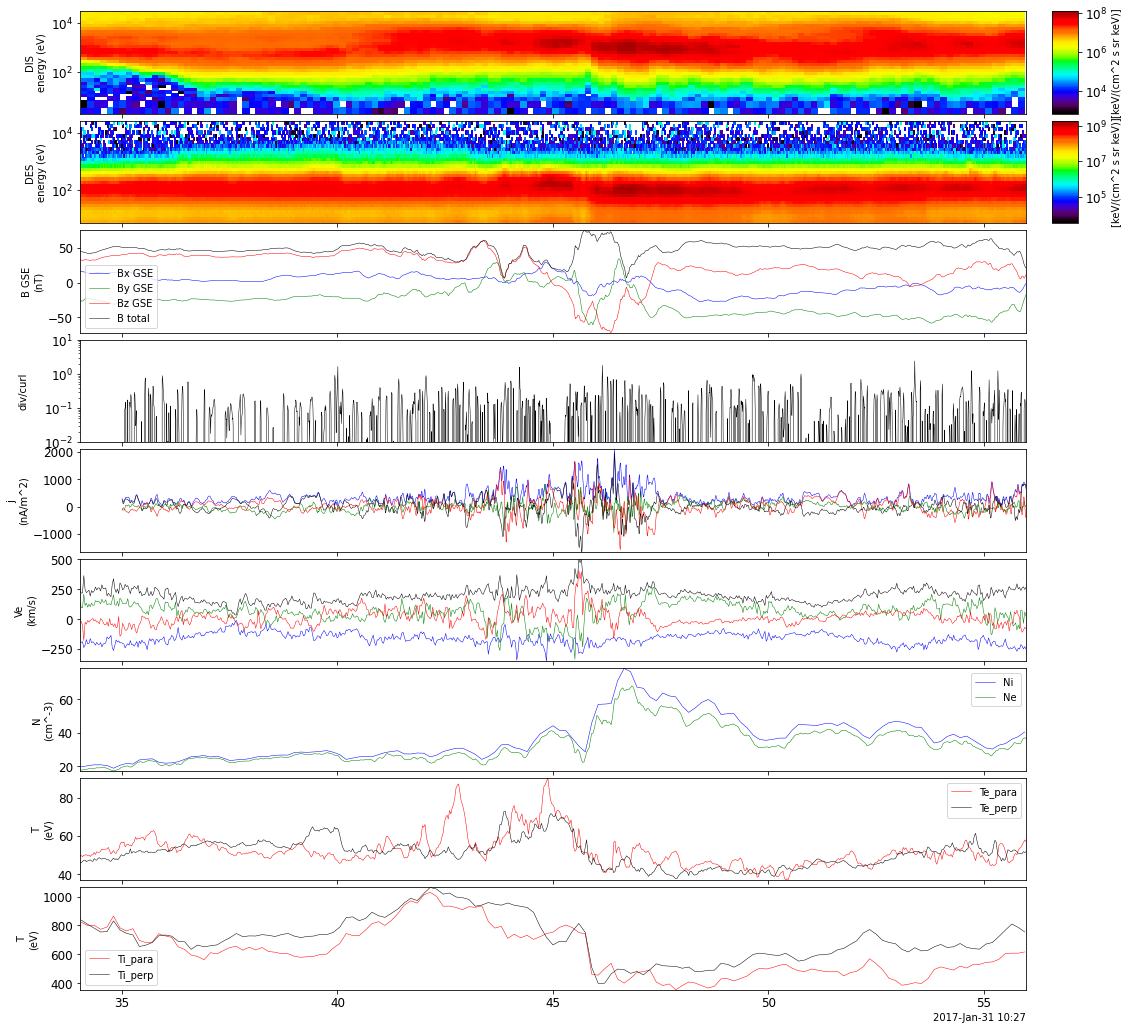

In [10]:
from pytplot import tplot

tplot(['mms'+probe+'_dis_energyspectr_omni_brst',
       'mms'+probe+'_des_energyspectr_omni_brst',
       'mms'+probe+'_fgm_b_gse_brst_l2',
       'div/curl',
       'j_data',
       'des_vel',
       'fpi_density',
       'des_temp',
       'dis_temp'], xsize=18, ysize=18)